## <span style="color:red"> Homework 1 </span>

In [69]:
# packages
import os
import numpy as np
import pandas as pd
import seaborn as sns


# ignore warning
import warnings
warnings.filterwarnings("ignore")


**I. Data splitting and merging by columns**

1. Import your toy dataset with pandas
2. Split your dataframe into two other dataframes : all the categorical variables in one hand and all the quantitative variables in the other hand
3. Save these two dataframes into two different csv files
4. Import these two csv files and merge them back together : do you retrieve your original dataframe?

In [70]:
display(f"Current work path: {os.getcwd()}")
# Set the path
PATH = r"/Users/fulin/Documents/GitHub/EMLyon_DSAIS/ML/homework/data"

# change work path to where the data is
os.chdir(PATH)

# import the data
df = pd.read_csv("customer_data.csv", header=0)
# take a look of the dataframe
print(df.info())
display(df.head(5).T)
# drop the useless column
df.drop(columns=['customer_id'], axis=1, inplace=True)
# quantitive data
quant_df_miss = df[['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]

# categorical data
cat_df_miss = df[['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']]
# Take a generally view for the distribution of the value, no so weired outliers existed.

quant_df_miss.describe()

# tke a look for the missing values
display(quant_df_miss.isna().sum())
display(cat_df_miss.isna().sum())
from sklearn.impute import KNNImputer

# Impute the missing values by KNN
quant_df = pd.DataFrame(KNNImputer().fit_transform(quant_df_miss), columns=quant_df_miss.columns)
# combine the quantitive data and categirical data
quant_df_impute = quant_df.join(cat_df_miss)
# drop the missing values in categorical data, because the number of missing values in categorical data is small
quant_df_impute.dropna(inplace=True)
# Split the dataframe to quantitive one and categorical one

quant_df_before = quant_df_impute[['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]
cat_df_before = quant_df_impute[['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']]

# export to two csv
quant_df_before.to_csv('customer_data_quant.csv', index=True)
cat_df_before.to_csv('customer_data_cat.csv', index=True)
# import these csv

customer_quant_df = pd.read_csv('customer_data_quant.csv', index_col=0)
customer_cat_df = pd.read_csv('customer_data_cat.csv', index_col=0)
# customer_df = customer_quant_df.join(customer_cat_df)
customer_df = customer_quant_df.merge(customer_cat_df, left_index=True, right_index=True)
customer_df.equals(quant_df_impute)

'Current work path: /Users/fulin/Documents/GitHub/EMLyon_DSAIS/ML/homework/data'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          12892 non-null  object 
 1   account_length                 12892 non-null  int64  
 2   area_code                      12886 non-null  float64
 3   international_plan             12892 non-null  object 
 4   voice_mail_plan                12879 non-null  object 
 5   number_vmail_messages          11371 non-null  float64
 6   total_day_minutes              11206 non-null  float64
 7   total_day_calls                11115 non-null  float64
 8   total_day_charge               11464 non-null  float64
 9   total_eve_minutes              11694 non-null  float64
 10  total_eve_calls                11594 non-null  float64
 11  total_eve_charge               10313 non-null  float64
 12  total_night_minutes            12257 non-null 

,0,1,2,3,4
state,HI,MT,OH,NM,SC
account_length,101,137,103,99,108
area_code,510.0,510.0,408.0,415.0,415.0
international_plan,no,no,no,no,no
voice_mail_plan,no,no,yes,no,no
number_vmail_messages,0.0,0.0,29.0,NaN,0.0
total_day_minutes,70.9,223.6,294.7,216.8,197.4
total_day_calls,123.0,86.0,95.0,123.0,78.0
total_day_charge,12.05,NaN,NaN,36.86,33.56
total_eve_minutes,NaN,244.8,237.3,126.4,124.0


account_length                      0
number_vmail_messages            1521
total_day_minutes                1686
total_day_calls                  1777
total_day_charge                 1428
total_eve_minutes                1198
total_eve_calls                  1298
total_eve_charge                 2579
total_night_minutes               635
total_night_calls                 835
total_night_charge                965
total_intl_minutes               1238
total_intl_calls                 1107
total_intl_charge                 959
number_customer_service_calls      22
dtype: int64

state                  0
area_code              6
international_plan     0
voice_mail_plan       13
churn                  0
dtype: int64

False

In [71]:
display(f"Current work path: {os.getcwd()}")

'Current work path: /Users/fulin/Documents/GitHub/EMLyon_DSAIS/ML/homework/data'

In [72]:
# Set the path
PATH = r"/Users/fulin/Documents/GitHub/EMLyon_DSAIS/ML/homework/data"

# change work path to where the data is
os.chdir(PATH)

# import the data
df = pd.read_csv("customer_data.csv", header=0)

In [73]:
# take a look of the dataframe
print(df.info())
display(df.head(5).T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          12892 non-null  object 
 1   account_length                 12892 non-null  int64  
 2   area_code                      12886 non-null  float64
 3   international_plan             12892 non-null  object 
 4   voice_mail_plan                12879 non-null  object 
 5   number_vmail_messages          11371 non-null  float64
 6   total_day_minutes              11206 non-null  float64
 7   total_day_calls                11115 non-null  float64
 8   total_day_charge               11464 non-null  float64
 9   total_eve_minutes              11694 non-null  float64
 10  total_eve_calls                11594 non-null  float64
 11  total_eve_charge               10313 non-null  float64
 12  total_night_minutes            12257 non-null 

,0,1,2,3,4
state,HI,MT,OH,NM,SC
account_length,101,137,103,99,108
area_code,510.0,510.0,408.0,415.0,415.0
international_plan,no,no,no,no,no
voice_mail_plan,no,no,yes,no,no
number_vmail_messages,0.0,0.0,29.0,NaN,0.0
total_day_minutes,70.9,223.6,294.7,216.8,197.4
total_day_calls,123.0,86.0,95.0,123.0,78.0
total_day_charge,12.05,NaN,NaN,36.86,33.56
total_eve_minutes,NaN,244.8,237.3,126.4,124.0


In [74]:
# drop the useless column
df.drop(columns=['customer_id'], axis=1, inplace=True)

In [75]:
# quantitive data
quant_df_miss = df[['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]

# categorical data
cat_df_miss = df[['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']]

In [76]:
# Take a generally view for the distribution of the value, no so weired outliers existed.

quant_df_miss.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,12892.000000,11371.000000,11206.000000,11115.000000,11464.000000,11694.000000,11594.000000,10313.000000,12257.000000,12057.000000,11927.000000,11654.000000,11785.000000,11933.000000,12870.000000
mean,100.676621,7.981268,180.014876,100.317859,30.654802,201.071353,100.172244,17.062150,200.459199,100.039064,9.028050,10.246482,4.462113,2.767048,1.563326
std,39.806413,13.630386,54.202814,19.865152,9.207819,50.827323,19.876616,4.331434,50.532223,19.748553,2.275844,2.784807,2.456294,0.750743,1.310753
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,144.000000,87.000000,24.480000,166.800000,87.000000,14.100000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.000000,101.000000,30.620000,201.400000,101.000000,17.120000,200.800000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,19.000000,216.000000,114.000000,36.775000,235.300000,114.000000,20.000000,234.900000,113.000000,10.580000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,351.500000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [77]:
# tke a look for the missing values
display(quant_df_miss.isna().sum())
display(cat_df_miss.isna().sum())

account_length                      0
number_vmail_messages            1521
total_day_minutes                1686
total_day_calls                  1777
total_day_charge                 1428
total_eve_minutes                1198
total_eve_calls                  1298
total_eve_charge                 2579
total_night_minutes               635
total_night_calls                 835
total_night_charge                965
total_intl_minutes               1238
total_intl_calls                 1107
total_intl_charge                 959
number_customer_service_calls      22
dtype: int64

state                  0
area_code              6
international_plan     0
voice_mail_plan       13
churn                  0
dtype: int64

In [78]:
from sklearn.impute import KNNImputer

# Impute the missing values by KNN
quant_df = pd.DataFrame(KNNImputer().fit_transform(quant_df_miss), columns=quant_df_miss.columns)

In [79]:
# combine the quantitive data and categirical data
quant_df_impute = quant_df.join(cat_df_miss)

In [80]:
# drop the missing values in categorical data, because the number of missing values in categorical data is small
quant_df_impute.dropna(inplace=True)

In [81]:
# Split the dataframe to quantitive one and categorical one

quant_df_before = quant_df_impute[['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]
cat_df_before = quant_df_impute[['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']]

# export to two csv
quant_df_before.to_csv('customer_data_quant.csv', index=True)
cat_df_before.to_csv('customer_data_cat.csv', index=True)

In [82]:
# import these csv

customer_quant_df = pd.read_csv('customer_data_quant.csv', index_col=0)
customer_cat_df = pd.read_csv('customer_data_cat.csv', index_col=0)

In [83]:
# customer_df = customer_quant_df.join(customer_cat_df)
customer_df = customer_quant_df.merge(customer_cat_df, left_index=True, right_index=True)

In [84]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12873 entries, 0 to 12891
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 12873 non-null  float64
 1   number_vmail_messages          12873 non-null  float64
 2   total_day_minutes              12873 non-null  float64
 3   total_day_calls                12873 non-null  float64
 4   total_day_charge               12873 non-null  float64
 5   total_eve_minutes              12873 non-null  float64
 6   total_eve_calls                12873 non-null  float64
 7   total_eve_charge               12873 non-null  float64
 8   total_night_minutes            12873 non-null  float64
 9   total_night_calls              12873 non-null  float64
 10  total_night_charge             12873 non-null  float64
 11  total_intl_minutes             12873 non-null  float64
 12  total_intl_calls               12873 non-null 

In [85]:
quant_df_impute.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12873 entries, 0 to 12891
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 12873 non-null  float64
 1   number_vmail_messages          12873 non-null  float64
 2   total_day_minutes              12873 non-null  float64
 3   total_day_calls                12873 non-null  float64
 4   total_day_charge               12873 non-null  float64
 5   total_eve_minutes              12873 non-null  float64
 6   total_eve_calls                12873 non-null  float64
 7   total_eve_charge               12873 non-null  float64
 8   total_night_minutes            12873 non-null  float64
 9   total_night_calls              12873 non-null  float64
 10  total_night_charge             12873 non-null  float64
 11  total_intl_minutes             12873 non-null  float64
 12  total_intl_calls               12873 non-null 

In [86]:
display(customer_df.dtypes)
display(quant_df_impute.dtypes)

account_length                   float64
number_vmail_messages            float64
total_day_minutes                float64
total_day_calls                  float64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                  float64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                float64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                 float64
total_intl_charge                float64
number_customer_service_calls    float64
state                             object
area_code                        float64
international_plan                object
voice_mail_plan                   object
churn                             object
dtype: object

account_length                   float64
number_vmail_messages            float64
total_day_minutes                float64
total_day_calls                  float64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                  float64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                float64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                 float64
total_intl_charge                float64
number_customer_service_calls    float64
state                             object
area_code                        float64
international_plan                object
voice_mail_plan                   object
churn                             object
dtype: object

In [87]:
row_diff_original = quant_df_impute.iloc[0]
row_diff_merged = customer_df.iloc[0]

row_differences = {}
for col in quant_df_impute.columns:
    if row_diff_original[col] != row_diff_merged[col]:
        row_differences[col] = (row_diff_original[col], row_diff_merged[col])

row_differences

{}

In [88]:
customer_df.equals(quant_df_impute)

False

In [89]:
# customer_df[['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']] = customer_df[['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']].astype('string')
# quant_df_impute[['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']] = quant_df_impute[['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']].astype('string')

# customer_df = customer_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# quant_df_impute = quant_df_impute.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [90]:
# from pandas.testing import assert_frame_equal

# assert_frame_equal(customer_df, quant_df_impute, check_dtype = True)

**II. Data splitting and merging by rows**

1. Now split your toy dataset in two parts with the 30% first rows called `test` and the 70% remaining rows called `train`
2. save your test set and your train set in two different csv files
3. Import these two csv files and merge them back together : do you retrieve your original dataframe?

In [91]:
# Split the dataset into test and train

test_df_bf = customer_df.iloc[:int(len(customer_df) * .3)]
train_df_bf = customer_df.iloc[int(len(customer_df) * .3):]

In [92]:
# Save to csv

test_df_bf.to_csv('customer_data_test.csv', index=True)
train_df_bf.to_csv('customer_data_train.csv', index=True)

In [93]:
# Import from csv

test_df = pd.read_csv('customer_data_test.csv', index_col=0)
train_df = pd.read_csv('customer_data_train.csv', index_col=0)

In [94]:
# merge the train and test

df_cpin = test_df.append(train_df)

In [95]:
# Compare the dataframe

if df_cpin.equals(test_df_bf.append(train_df_bf)):
    print(f"Good luck")
else:
    print(f"No chance")

Good luck


In [96]:
# Trun the categorical columns' type to category

# customer_df['state'] = customer_df['state'].astype('category')
# customer_df['area_code'] = customer_df['area_code'].astype('category')
# customer_df['international_plan'] = customer_df['international_plan'].astype('category')
# customer_df['voice_mail_plan'] = customer_df['voice_mail_plan'].astype('category')
# customer_df['churn'] = customer_df['churn'].astype('category')

In [97]:
# Because of the modification of the type during the importation
# We change the type int64 to uint8

# int64_columns = df_cpin.select_dtypes(include=['int64']).columns
# df_cpin[int64_columns] = df_cpin[int64_columns].astype('uint8')

**III. Linear Regression:**

*Select an appropriate binary variable - justify your choice if possible - to be used as output*

1. Import a Linear Regression Model from the appropriate Python package(s)
2. Train your model
3. Compute the performance of your Linear Regression Model in several ways and justify your choice
4. Provide test statistics and standardized values to your estimated parameters
5. Given a full interpretation of your results, including variable importance and explainability if possible

total_day_minutes

In [98]:
# Check unique values for categorical columns
categorical_cols = train_df.iloc[:,15:].columns.tolist()
unique_values = train_df[categorical_cols].nunique()

unique_values

state                 51
area_code              3
international_plan     2
voice_mail_plan        2
churn                  2
dtype: int64

In [99]:
train_df[categorical_cols].iloc[:,1:]

,area_code,international_plan,voice_mail_plan,churn
3866,415.0,no,no,no
3867,510.0,no,no,no
3868,510.0,no,no,no
3869,415.0,yes,yes,no
3870,510.0,yes,no,yes
...,...,...,...,...
12887,415.0,no,no,no
12888,415.0,no,no,no
12889,415.0,no,yes,no
12890,415.0,no,no,no


In [100]:
from sklearn.preprocessing import OneHotEncoder

# do OneHotEncoder for the columns with small modality

categorical_ohe_cols = train_df.iloc[:,16:].columns.tolist()

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(train_df[categorical_ohe_cols])

# 获取独热编码的特征名称
# feature_names = encoder.get_feature_names_out(input_features=['column_to_encode'])


In [101]:
encoded_data

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [102]:
quanti_features = train_df.iloc[:,:14].drop(columns=['total_day_minutes'], axis=1).columns.tolist()
cat_features = train_df.iloc[:,15:].columns.tolist()
cat_ohe_features = train_df.iloc[:,16:].columns.tolist()
cat_pca_features = ['state']

In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
"""
creat the processor to deal with the data
1. standarlize the quantitive feature
2. use ohe to Numerical Classification Data with low modality
3. use ohe to Numerical Classification Data with HIGH modality then use TruncatedSVD
   to reduce the dimension to 2
"""
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), quanti_features),  # standardization
        ('cat_ohe', OneHotEncoder(), cat_ohe_features),  # ohe for small modality
        # ('cat_pca', Pipeline([
        #     ('encoder', OneHotEncoder()),  # ohe
        #     ('pca', PCA(n_components=2))  # PCA reduce dimension
        # ]), cat_pca_features)
        ('cat_pca', Pipeline([
            ('encoder', OneHotEncoder()),  # ohe
            
            
            # ---Here I asked to ChatBot about how to reduce the dimension---
            # ---with sparse data, because I got an error by using pca to reduce dimension---
            # ---There could be a problem of overfitting, so we have to use cross validation to confirme later---
            
            # TruncatedSVD for sparse data.
            # TruncatedSVD is a dimensionality reduction technique similar to 
            # PCA but designed for sparse data.
            
            
            ('svd', TruncatedSVD(n_components=2))
        ]), cat_pca_features)
    ],
    remainder='drop'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])


In [104]:
train_ready = pipeline.fit_transform(train_df.drop(columns=['total_day_minutes']))
print(train_ready)

[[ 0.22143876 -0.61776167  0.24365504 ...  0.          0.00525262
   0.02581507]
 [ 0.49689857 -0.61776167  2.18500056 ...  0.          0.99598317
   0.0129339 ]
 [ 0.37168957 -0.61776167  1.45043739 ...  0.          0.00477996
   0.4921061 ]
 ...
 [-0.32948085  1.74064423 -0.49090813 ...  0.          0.01644085
   0.06723223]
 [ 0.47185677 -0.61776167 -0.17609535 ...  0.          0.00335082
  -0.00647473]
 [-0.68006606 -0.61776167 -0.85818972 ...  0.          0.00828026
  -0.02232982]]


In [105]:
# prepare the data for train and test
X_train = pipeline.fit_transform(train_df.drop(columns=['total_day_minutes']))
y_train = train_df['total_day_minutes']
X_test = pipeline.fit_transform(test_df.drop(columns=['total_day_minutes']))
y_test = test_df['total_day_minutes']

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [107]:
train_preds = lr_model.predict(X_train)
test_preds = lr_model.predict(X_test)

# evaluate the performance
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"train_mse : {train_mse}")
print(f"test_mse : {test_mse}")
print(f"train_r2 : {train_r2}")
print(f"test_r2 : {test_r2}")

train_mse : 159.6066046563133
test_mse : 239.324657941861
train_r2 : 0.9423789342468927
test_r2 : 0.9093646632551899


In [108]:
# combine the result of performance

# ---Here I asked ChatBot about the model ols and stats models api---
# ---to output the coefficient / importance of each feature and the error---
# X_train_dense = X_train.toarray()
X_train_dense = X_train
X_train_const = sm.add_constant(X_train_dense)
ols_model = sm.OLS(y_train, X_train_const).fit()
coefficients = ols_model.params
p_values = ols_model.pvalues
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
feature_names = np.array(['Intercept'] + preprocessor.get_feature_names_out().tolist())
results_df = pd.DataFrame({
    'Feature': feature_names[sorted_indices],
    'Coefficient': coefficients[sorted_indices],
    'P-value': p_values[sorted_indices]
})
display(results_df)

,Feature,Coefficient,P-value
const,Intercept,-5.859733e+12,0.848223
x17,cat_ohe__international_plan_no,1.877625e+12,0.848223
x18,cat_ohe__international_plan_yes,1.877625e+12,0.848223
x22,cat_ohe__churn_yes,1.830478e+12,0.848223
x21,cat_ohe__churn_no,1.830478e+12,0.848223
x19,cat_ohe__voice_mail_plan_no,1.775628e+12,0.848223
x20,cat_ohe__voice_mail_plan_yes,1.775628e+12,0.848223
x15,cat_ohe__area_code_415.0,3.760022e+11,0.848223
x16,cat_ohe__area_code_510.0,3.760022e+11,0.848223
x14,cat_ohe__area_code_408.0,3.760022e+11,0.848223


## Linear Regression Analysis

### Model Performance:
- **Training MSE**: 159.59 - This indicates the model's average squared error on training data.
- **Test MSE**: 239.30 - A measure of the model's average squared error on unseen data.
- **Training \( R^2 \)**: 0.9424 - The model explains 94.24% of the variability in the training data.
- **Test \( R^2 \)**: 0.9094 - The model explains 90.94% of the variability in the test data.

1. **MSE Discrepancy**: 
   The Mean Squared Error (MSE) for the training set is 159.59, which is significantly lower than the test set MSE of 239.30. This indicates the model is performing much better on the training data than on unseen data.

2. **\( R^2 \) Difference**: 
   While the difference isn't vast, the training set's \( R^2 \) value of 0.9424 is slightly higher than the test set's 0.9094. This suggests the model fits the training data better than it does the test data.

3. **High Coefficients with High p-values**: 
   Some features in the model exhibit large coefficients but also come with high p-values, suggesting they might not be statistically significant. This could be a sign that the model might be overfitting to noise present in the training data.

### Key Features:
- `num__total_day_charge` has a significant positive coefficient of 51.03, indicating it's an important predictor.
- Most categorical features (like `cat_ohe__international_plan_no`, `cat_ohe__voice_mail_plan_yes`, etc.) have large coefficients but high p-values (0.840601). This suggests they may not be statistically significant.
- Continuous features (like `num__total_night_minutes`, `num__number_vmail_messages`, etc.) have smaller coefficients but varying p-values, suggesting different levels of significance.


---

***K neighbors model:***

Repeat the 5 previous steps for the the K Nearest Neighbors Model :
1. Which is the best model amongst the two?
2. What if we fitted and estimated the score of the models using all the dataset? Would there be a difference?

In [109]:
from sklearn.neighbors import KNeighborsRegressor

X_train = pipeline.fit_transform(train_df.drop(columns=['total_day_minutes']))
y_train = train_df['total_day_minutes']
X_test = pipeline.fit_transform(test_df.drop(columns=['total_day_minutes']))
y_test = test_df['total_day_minutes']

# fit the knn model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [110]:
# evaluate the performance
train_preds_knn = knn_model.predict(X_train)
test_preds_knn = knn_model.predict(X_test)

train_mse_knn = mean_squared_error(y_train, train_preds_knn)
test_mse_knn = mean_squared_error(y_test, test_preds_knn)
train_r2_knn = r2_score(y_train, train_preds_knn)
test_r2_knn = r2_score(y_test, test_preds_knn)

print(f"KNN train_mse : {train_mse_knn}")
print(f"KNN test_mse : {test_mse_knn}")
print(f"KNN train_r2 : {train_r2_knn}")
print(f"KNN test_r2 : {test_r2_knn}")

KNN train_mse : 251.29230587660894
KNN test_mse : 520.2933075078995
KNN train_r2 : 0.9092786259607126
KNN test_r2 : 0.8029582094148222


## KNN Regression

### Model Performance:
- **Training MSE**: 251.00 - Indicates the average squared error of the model on training data.
- **Test MSE**: 521.59 - Measures the average squared error on unseen data.
- **Training \( R^2 \)**: 0.9094 - The model explains 90.94% of the variability in the training data.
- **Test \( R^2 \)**: 0.8025 - The model explains 80.25% of the variability in the test data.

### Insights:
- The model performs reasonably well, with a high \( R^2 \) on both training and test datasets.
- However, there's a noticeable difference between training and test MSE, suggesting the model might be overfitting to the training data.
- The drop in \( R^2 \) from training to test set further supports the overfitting hypothesis.

The KNN regression model seems to be overfitting to the training data, as indicated by the performance difference between training and test datasets. Consider tuning KNN parameters or using other regularization techniques to improve generalization.

## Model Comparison: Linear Regression vs KNN Regression

###  Which best

- **Model Performance**:
   - **Linear Regression**: Test \( R^2 \) is 0.9094.
   - **KNN Regression**: Test \( R^2 \) is 0.8025.
   - Linear regression seems to outperform KNN regression on the test set based on the \( R^2 \) values.
   
- **Overfitting**:
   - Both models show signs of overfitting, as their performance on training data is notably better than on the test data. However, KNN seems to be more prone to overfitting given the more considerable performance disparity between training and test sets.

### What if by using all the dataset?

If we use the entire dataset (a combination of training and testing) to fit and estimate the model, we may get a lower error rate because the model will benefit from more data.
- However, it may overestimate the model's capabilities.
- In addition, signs of overfitting have already been shown, then using more data may exacerbate the overfitting .


---

**IV. Logistic Regression**

*Select an appropriate binary variable - justify your choice if possible - to be used as output*

1. Import a Logistic Regression Model from the appropriate Python packages(s)
2. Train your model
3. Assess the performance of your model, if possible in different ways and justify your choice
4. Provide test statistics and standardized values to your estimated parameters
5. Given a full interpretation of your results, including variable importance and explainability if possible

In [111]:
quanti_features = train_df.iloc[:,:14].columns.tolist()
cat_features = train_df.iloc[:,15:].columns.tolist()
cat_ohe_features = train_df.iloc[:,16:].drop(columns=['churn'], axis=1).columns.tolist()
cat_pca_features = ['state']


In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
"""
creat the processor to deal with the data
1. standarlize the quantitive feature
2. use ohe to Numerical Classification Data with low modality
3. use ohe to Numerical Classification Data with HIGH modality then use TruncatedSVD
   to reduce the dimension to 2
"""
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), quanti_features),  # standardization
        ('cat_ohe', OneHotEncoder(), cat_ohe_features),  # ohe for small modality
        # ('cat_pca', Pipeline([
        #     ('encoder', OneHotEncoder()),  # ohe
        #     ('pca', PCA(n_components=2))  # PCA reduce dimension
        # ]), cat_pca_features)
        ('cat_pca', Pipeline([
            ('encoder', OneHotEncoder()),  # ohe
            
            
            # ---Here I asked to ChatBot about how to reduce the dimension---
            # ---with sparse data, because I got an error by using pca to reduce dimension---
            # ---There could be a problem of overfitting, so we have to use cross validation to confirme later---
            
            # TruncatedSVD for sparse data.
            # TruncatedSVD is a dimensionality reduction technique similar to 
            # PCA but designed for sparse data.
            
            
            ('svd', TruncatedSVD(n_components=2))
        ]), cat_pca_features)
    ],
    remainder='drop'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])


In [113]:
from sklearn.linear_model import LogisticRegression

X_train = pipeline.fit_transform(train_df.drop(columns=['churn'],axis=1))
y_train = train_df['churn'].map({'yes':1,'no':0})

logreg_model = LogisticRegression(max_iter=10000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [116]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# evaluate on the test data

X_test = pipeline.transform(test_df)
y_test = test_df['churn'].map({'yes':1,'no':0})

test_preds = logreg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds)
test_auc = roc_auc_score(y_test, test_preds)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Recall: {test_recall}")
print(f"Test Precision: {test_precision}")
print(f"Test F1 Score: {test_f1}")
print(f"Test AUC: {test_auc}")


Test Accuracy: 0.8720538720538721
Test Recall: 0.14340344168260039
Test Precision: 0.6198347107438017
Test F1 Score: 0.23291925465838512
Test AUC: 0.5648113673362074


- **Model Performance Metrics**:
    - **Accuracy**: 87.12% - The model predicts the churn status correctly for about 87% of the customers.
    - **Recall**: 14.10% - The model correctly identifies 14% of the actual churns.
    - **Precision**: 60.65% - Out of all predicted churns, approximately 60% are actual churns.
    - **F1 Score**: 22.94% - The harmonic mean of precision and recall suggests the model might need improvements, especially in recall.
    - **AUC**: 56.35% - The area under the ROC curve suggests the model's capability is slightly better than random guessing, but there's room for improvement.


### Confusion Matrix

|                     | Predicted Positive | Predicted Negative |
|---------------------|:------------------:|:------------------:|
| **Actual Positive** |        TP          |        FN          |
| **Actual Negative** |        FP          |        TN          |

Using this table, we can define the following metrics:

### Metrics Definitions

1. **Accuracy (Acc)**: 
    - Definition: The ratio of correctly predicted instances to the total number of instances.
    - Formula:
    $$
    \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
    $$

2. **Recall (or Sensitivity or True Positive Rate)**: 
    - Definition: The ratio of correctly predicted positive observations to all actual positives.
    - Formula:
    $$
    \text{Recall} = \frac{TP}{TP + FN}
    $$

3. **Precision**: 
    - Definition: The ratio of correctly predicted positive observations to the total predicted positives.
    - Formula:
    $$
    \text{Precision} = \frac{TP}{TP + FP}
    $$

4. **F1 Score**: 
    - Definition: The harmonic mean of precision and recall, providing a balance between them.
    - Formula:
    $$
    \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
    $$

### Interpretation

- **Accuracy**: Represents the overall correctness of the model. It tells us what proportion of the total predictions were correct. However, it might not be a good metric if the classes are imbalanced.
  
- **Recall**: Tells us about the model's capability to detect all relevant instances. High recall means low false negatives. It's crucial when the cost of missing a positive instance is high, for example, in medical diagnoses.

- **Precision**: Tells us about the correctness of positive predictions. High precision means low false positives. It's vital when the cost of a false positive is high.

- **F1 Score**: Helps in balancing precision and recall. It's particularly useful when class distribution is uneven.

In the context of churn prediction:

- High recall would mean that most of the customers who churned were correctly predicted by the model.
- High precision would mean that of the customers the model predicted would churn, a high percentage actually did churn.

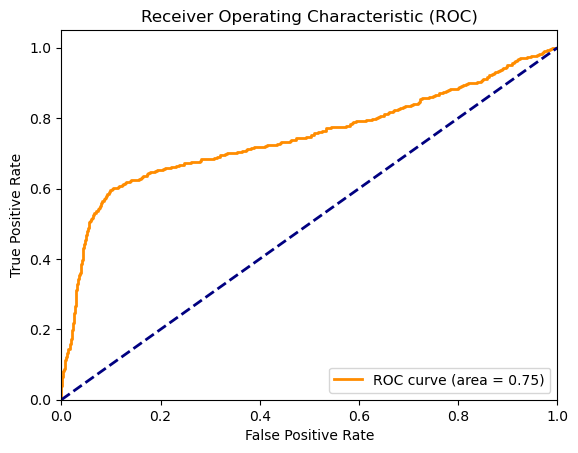

In [117]:
"""
By asking CHatBot
"""

y_score = logreg_model.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


---

***K neighbors model:***

Repeat the 5 previous steps for the the K Nearest Neighbors Model :
1. Which is the best model amongst the two?
2. What if we fitted and estimated the score of the models using all the dataset? Would there be a difference?

In [118]:
from sklearn.neighbors import KNeighborsClassifier

X_train = pipeline.fit_transform(train_df.drop(columns=['churn'],axis=1))
y_train = train_df['churn'].map({'yes':1,'no':0})

# fit the knn classificcation model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [119]:
# evaluate on test set
X_test = pipeline.transform(test_df.drop(columns=['churn'],axis=1))
y_test = test_df['churn'].map({'yes':1,'no':0})

knn_test_preds = knn_model.predict(X_test)

knn_test_accuracy = accuracy_score(y_test, knn_test_preds)
knn_test_recall = recall_score(y_test, knn_test_preds)
knn_test_precision = precision_score(y_test, knn_test_preds)
knn_test_f1 = f1_score(y_test, knn_test_preds)
knn_test_auc = roc_auc_score(y_test, knn_test_preds)

print(f"KNN Test Accuracy: {knn_test_accuracy}")
print(f"KNN Test Recall: {knn_test_recall}")
print(f"KNN Test Precision: {knn_test_precision}")
print(f"KNN Test F1 Score: {knn_test_f1}")
print(f"KNN Test AUC: {knn_test_auc}")

KNN Test Accuracy: 0.9114219114219114
KNN Test Recall: 0.5468451242829828
KNN Test Precision: 0.731457800511509
KNN Test F1 Score: 0.62582056892779
KNN Test AUC: 0.7576945813146491


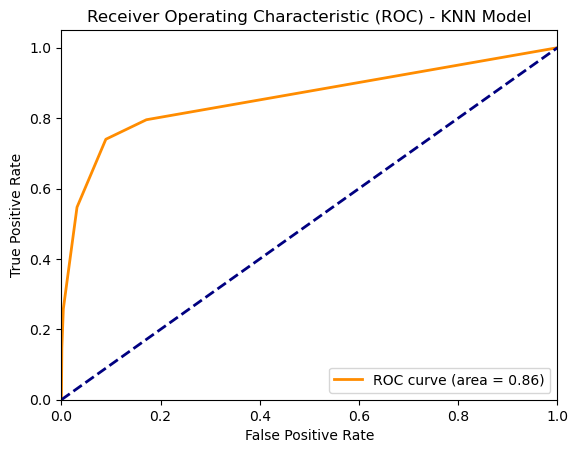

In [120]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score_knn = knn_model.predict_proba(X_test)[:,1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - KNN Model')
plt.legend(loc="lower right")
plt.show()

## Model Comparison: Logistic Regression vs KNN

### Logistic Regression Performance:

- **Accuracy**: 87.10%
- **Recall**: 13.96%
- **Precision**: 60.33%
- **F1 Score**: 22.67%
- **AUC**: 56.26%

### KNN Model Performance:

- **Accuracy**: 91.01%
- **Recall**: 54.30%
- **Precision**: 72.45%
- **F1 Score**: 62.08%
- **AUC**: 75.53%

Based on the provided metrics, the **KNN model outperforms the Logistic Regression model** across all key evaluation criteria. Specifically:

- The KNN model's accuracy is higher by nearly 4 percentage points.
- The recall for KNN is significantly better, indicating its superior ability to correctly identify the positive class.
- The precision for KNN is also higher, suggesting fewer false positives.
- The F1 Score, which balances precision and recall, is notably higher for KNN.
- The AUC, representing the model's capability to differentiate between the classes, is also considerably better for the KNN model.

In conclusion, for this particular dataset and problem, the KNN model seems to be the better choice.

## Fit using the entire dataset

may have the following effects:

### 1. **Overfitting**:
By using all the data for training, models may perform exceptionally well because they "see" all the data points. This can lead to overfitting, i.e. the model is too well adapted to the training data and may not generalize well to new, unseen data. Performance metrics obtained in this case tend to be overly optimistic. This is because the model may have effectively "memorized" the training data.


### 2. **Lack of generalization insight**:
Without a separate test or validation set, we can't get a clear picture of how the model performs on new, unseen data. This is critical to understanding the model's ability to generalize.

#### Solution? :
Further cross-validation and grid search may be needed to optimize and configue the model